# Fig 1 RPE GSEA and Differential Expression

## Initialization

In [1]:
# Load libraries
library(ggplot2)
library(ggrepel)
library(ggpubr)
library(ggsci)
library(dplyr)
library(tidyr)
library(viridis)
library(plotthis)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: viridisLite



In [2]:
# Initialize location
setwd("/home/dalbao/2023-012-Runx3mutD8scRNA/AlbaoRunx3Manuscript/figures/01")

# Load scripts
source("../../scripts/volcano.R")
source("../../scripts/plotSEA.R")

Warning message:
“package ‘ggpp’ was built under R version 4.4.3”
Registered S3 methods overwritten by 'ggpp':
  method                  from   
  heightDetails.titleGrob ggplot2
  widthDetails.titleGrob  ggplot2


Attaching package: ‘ggpp’


The following objects are masked from ‘package:ggpubr’:

    as_npc, as_npcx, as_npcy


The following object is masked from ‘package:ggplot2’:

    annotate




## Plot RPE GSEA

In [3]:
# Load GSEA CSV
gsea <- read.csv("../../csv/05_25-12-08-03-16_cVr-GSEA_RPE.csv.gz")

# Check
head(gsea)

cluster  ID                                      
1 Cluster0 TexTerm-Tgfb_promoted                   
2 Cluster0 Diao_P0                                 
3 Cluster0 Exp391_CD8---GSE68056_WT_vs_Il2raKO---WT
4 Cluster0 Diao_P1                                 
5 Cluster0 Exp391_CD8---NAV_up                     
6 Cluster0 Exp391_CD8---JJM_TrmSignature           
  Description                              setSize enrichmentScore NES      
1 TexTerm-Tgfb_promoted                    1366    -0.7131385      -1.613357
2 Diao_P0                                    97    -0.7584955      -1.590163
3 Exp391_CD8---GSE68056_WT_vs_Il2raKO---WT  249    -0.7108666      -1.571554
4 Diao_P1                                    79    -0.7571951      -1.562655
5 Exp391_CD8---NAV_up                       490    -0.6813724      -1.524271
6 Exp391_CD8---JJM_TrmSignature             121    -0.7003243      -1.496142
  pvalue       p.adjust    qvalue      rank leading_edge                  
1 0.0000999900 0.002135585 0.001711534 2262 tags=23%, list=12%, signal=22%
2 0.0001071237 0.002135585 0.001711534 2345 tags=55%, list=13%, signal=48%
3 0.0001013685 0.002135585 0.001711534 3545 tags=61%, list=19%, signal=50%
4 0.0001092061 0.002135585 0.001711534 2498 tags=62%, list=13%, signal=54%
5 0.0001000700 0.002135585 0.001711534 2872 tags=45%, list=16%, signal=39%
6 0.0001051193 0.002135585 0.001711534 4204 tags=69%, list=23%, signal=53%
  core_enrichment                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
1 Ppp2r3a/Ermp1/Ap4e1/Casc4/Tmx4/Topbp1/Cpeb2/Raver2/Atxn2/Ncbp3/Ddx58/Zfp827/Cd53/Grk4/Trim30d/Rttn/Crim1/Esf1/Trp53inp1/Immt/Ppm1g/Sin3a/Stx16/Zcchc8/Mcu/Fosl2/Nup155/Pign/Rnf214/Scyl2/Ppp6r2/Mbtps2/Midn/Zdhhc21/Arnt/Rc3h2/Poldip3/Zhx2/Cand1/Ice1/Ercc6/Dnmt3a/Dph6/Gmip/Irf4/Haus6/Znrf1/Ttc37/Strbp/Pkp4/Mms19/Shprh/Reep3/Hlcs/Adcy7/Slc25a51/Atg10/Cenpc1/Atr/Acox1/Yme1l1/Focad/Mphosph9/Kat6b/Yeats2/Slc6a6/Napg/Gtf3c1/Ctr9/Pcnt/Cul5/Ip6k1/mt-Nd6/Calcrl/Efcab14/Zmym4/Paip1/Gimap8/Iqsec1/Ppp4r1/Wasl/Atg2b/Htt/St8sia4/Rnf20/Tmcc1/Nbeal1/Dtx3l/L3mbtl3/Ppip5k2/Klhl24

In [4]:
# Replace Cluster prefix in cluster with MRE
gsea$cluster <- gsub("Cluster", "RPE", gsea$cluster)

In [ ]:
# Calculate negative logarithm of q-value
gsea$log_qvalue <- -log10(gsea$qvalue)

# Filter significant q-values
significant_df <- subset(gsea, qvalue < 0.05)

# Sometimes, there are empty values, we need to make filler data
# plotFiller to Fill all positions in plot this is necessary to avoid empty plots
dummy_data1 <- data.frame(
    cluster = unique(gsea$cluster),
    ID = "plotFiller1",
    NES = 0,
    log_qvalue = -log10(0.05)
)

dummy_data2 <- data.frame(
    cluster = unique(gsea$cluster),
    ID = "plotFiller2",
    NES = 0,
    log_qvalue = -log10(0.05)
)

dummy_data3 <- data.frame(
    cluster = unique(gsea$cluster),
    ID = "plotFiller3",
    NES = 0,
    log_qvalue = -log10(0.05)
)

dummy_data4 <- data.frame(
    cluster = unique(gsea$cluster),
    ID = "plotFiller4",
    NES = 0,
    log_qvalue = -log10(0.05)
)

# Make a dummy cluster for breaking the plot
dummy_cluster <- data.frame(
    cluster = "cluster_break",
    ID = c(unique(gsea$ID), "plotFiller"),
    NES = 0,
    log_qvalue = -log10(0.05)
)

# Make a dummy cluster for breaking the plot
dummy_cluster2 <- data.frame(
    cluster = "cluster_break2",
    ID = c(unique(gsea$ID), "plotFiller"),
    NES = 0,
    log_qvalue = -log10(0.05)
)

# Select only relevant columns
significant_df <- significant_df %>%
    select(
        cluster,
        ID,
        NES,
        log_qvalue
    )

# Bind filler data
significant_df <- rbind(significant_df,
                        dummy_data1,
                        dummy_data2,
                        dummy_data3,
                        dummy_data4,
                        dummy_cluster,
                        dummy_cluster2)

In [6]:
# Create set reassignments (pretty namees)
set_dict <- c(
    "WangD8Runx3Promoted"           = "D8 RUNX3-promoted",
    "WangD8Runx3Repressed"          = "D8 RUNX3-repressed",
    "plotFiller1"                   = "plotFiller1",
    "2016_SCIENCE_Mackay---TCM_vs_TEM-TRM"                = "TCM-exclusive",
    "2016_SCIENCE_Mackay---TEM_vs_TCM-TRM"                = "TEM-exclusive",
    "2016_SCIENCE_Mackay---TRM_vs_TCM-TEM"                = "TRM-exclusive",
    "plotFiller2"                   = "plotFiller2",
    "Exp391_CD8---JJM_CirculatingSignature"		        = "circulating signature",
    "Exp391_CD8---JJM_TrmSignature"     		        = "residency signature",
    "plotFiller3"                   = "plotFiller3",
    "Held_D8_TCF7_POS"      = "up in Tcf7+ TEFF",
    "Held_D8_TCF7_NEG"		= "down in Tcf7+ TEFF",
    "Johnnidis_D8_CD62LHi"  = "CD62L+ TEFF",
    "Bresser_ldTcm"         = "lowly-divided TCM",
    "Bresser_hdTcm"         = "highly-divided TCM"
)

# Invert order of set_dict
set_dict <- rev(set_dict)

# Select only relevant enrichments
significant_df <- significant_df %>%
    filter(ID %in% names(set_dict))

# Reassign pretty names
significant_df <- significant_df %>%
    mutate(ID = set_dict[ID])

# Factorize ID
significant_df$ID <- factor(significant_df$ID, levels = set_dict)

# Create cluster reassignments (pretty names)
cluster_dict <- c(
    "RPE2"  = "RPE2",
    "RPE4"  = "RPE4",
    "cluster_break" = "cluster_break",
    "RPE0"  = "RPE0",
    "RPE1"  = "RPE1",
    "cluster_break2" = "cluster_break2",
    "RPE3"  = "RPE3",
    "RPE5"  = "RPE5",
    "RPE7"  = "RPE7"
)

# Select only relevant clusters
significant_df <- significant_df %>%
    filter(cluster %in% names(cluster_dict))

# Reassign pretty names
significant_df <- significant_df %>%
    mutate(cluster = cluster_dict[cluster])

# Factorize cluster
significant_df$cluster <- factor(significant_df$cluster, levels = cluster_dict)

In [7]:
p <- plotSEAbubble( sea_results = significant_df,
                    comparison = "Cluster vs Rest",
                    enrichment_type = "Gene",
                    color_scale = c("#3c97daff", "#ddddddff", "#fe9d52ff")
) + labs(x = NULL, y = NULL)

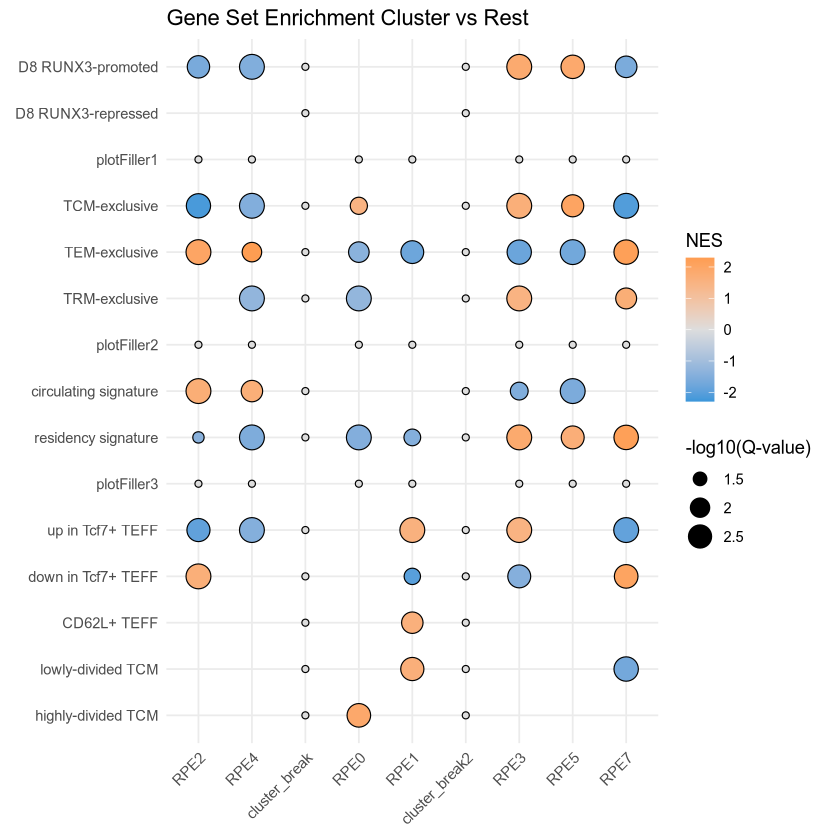

In [8]:
print(p)

In [9]:
pdf("figures/GSEA-Fig1D.pdf", height = 4.5, width = 4.8)
print(p)
dev.off()

pdf 
  2

In [ ]:
# Calculate negative logarithm of q-value
gsea$log_qvalue <- -log10(gsea$qvalue)


# Filter significant q-values
significant_df <- subset(gsea, qvalue < 0.05)
# Sometimes, there are empty values, we need to make filler data
# plotFiller to Fill all positions in plot this is necessary to avoid empty plots
dummy_data1 <- data.frame(
    cluster = unique(gsea$cluster),
    ID = "plotFiller1",
    NES = 0,
    log_qvalue = -log10(0.05)
)

dummy_data2 <- data.frame(
    cluster = unique(gsea$cluster),
    ID = "plotFiller2",
    NES = 0,
    log_qvalue = -log10(0.05)
)

dummy_data3 <- data.frame(
    cluster = unique(gsea$cluster),
    ID = "plotFiller3",
    NES = 0,
    log_qvalue = -log10(0.05)
)

dummy_data4 <- data.frame(
    cluster = unique(gsea$cluster),
    ID = "plotFiller4",
    NES = 0,
    log_qvalue = -log10(0.05)
)

# Make a dummy cluster for breaking the plot
dummy_cluster <- data.frame(
    cluster = "cluster_break",
    ID = c(unique(gsea$ID), "plotFiller"),
    NES = 0,
    log_qvalue = -log10(0.05)
)

# Make a dummy cluster for breaking the plot
dummy_cluster2 <- data.frame(
    cluster = "cluster_break2",
    ID = c(unique(gsea$ID), "plotFiller"),
    NES = 0,
    log_qvalue = -log10(0.05)
)

# Select only relevant columns
significant_df <- significant_df %>%
    select(
        cluster,
        ID,
        NES,
        log_qvalue
    )

# Bind filler data
significant_df <- rbind(significant_df,
                        dummy_data1,
                        dummy_data2,
                        dummy_data3,
                        dummy_data4,
                        dummy_cluster,
                        dummy_cluster2)

In [11]:
# Create set reassignments (pretty names)
set_dict <- c(
    "Exp391_CD8---TE_up"          = "up in TE",
    "Exp391_CD8---TE_dn"          = "down in TE",
    "Exp391_CD8---DP_up"          = "up in DP",
    "Exp391_CD8---DP_dn"          = "down in DP",
    "Exp391_CD8---MP_up"          = "up in MP",
    "Exp391_CD8---MP_dn"          = "down in MP",
    "Exp391_CD8---EE_up"          = "up in EE",
    "Exp391_CD8---EE_dn"          = "down in EE",
    "plotFiller1"                 = "plotFiller1",
    "Exp391_CD8---klf2_promoted"  = "KLF2-promoted",
    "Exp391_CD8---klf2_repressed" = "KLF2-repressed"
)

# Invert order of set_dict
set_dict <- rev(set_dict)

# Select only relevant enrichments
significant_df <- significant_df %>%
    filter(ID %in% names(set_dict))

# Reassign pretty names
significant_df <- significant_df %>%
    mutate(ID = set_dict[ID])

# Factorize ID
significant_df$ID <- factor(significant_df$ID, levels = set_dict)

# Create cluster reassignments (pretty names)
cluster_dict <- c(
    "RPE2"  = "RPE2",
    "RPE4"  = "RPE4",
    "cluster_break" = "cluster_break",
    "RPE0"  = "RPE0",
    "RPE1"  = "RPE1",
    "cluster_break2" = "cluster_break2",
    "RPE3"  = "RPE3",
    "RPE5"  = "RPE5",
    "RPE7"  = "RPE7"
)

# Select only relevant clusters
significant_df <- significant_df %>%
    filter(cluster %in% names(cluster_dict))

# Reassign pretty names
significant_df <- significant_df %>%
    mutate(cluster = cluster_dict[cluster])

# Factorize cluster
significant_df$cluster <- factor(significant_df$cluster, levels = cluster_dict)

In [12]:
p <- plotSEAbubble( sea_results = significant_df,
                    comparison = "Cluster vs Rest",
                    enrichment_type = "Gene",
                    color_scale = c("#3c97daff", "#ddddddff", "#fe9d52ff")
) + labs(x = NULL, y = NULL)

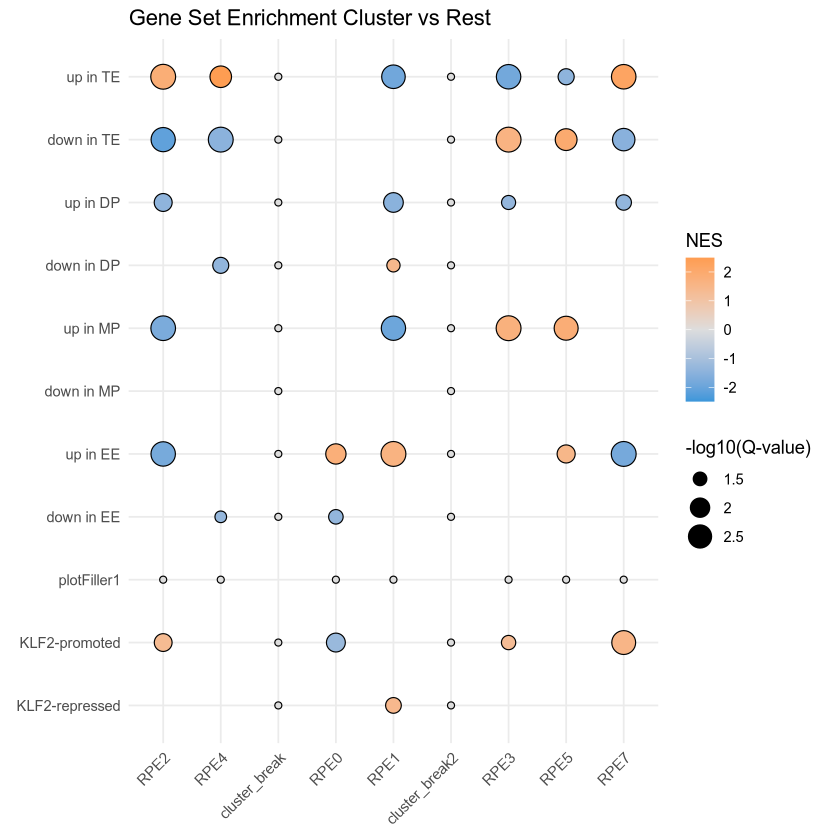

In [13]:
print(p)

In [14]:
pdf("figures/GSEA-EFig1C.pdf", height = 4.5, width = 4.5)
print(p)
dev.off()

pdf 
  2

## Cluster-Group Distributions

In [15]:
# Load obs dataframe
clusters <- read.csv("../../csv/03_25-12-06-01-06_obsDf_clustering_RPE.csv.gz")

# Limit to group and leiden_r1
clusters <- clusters[, c("group", "leiden_r1")]

# Recode group
clusters$group <- recode(clusters$group,
                            "Naive"         = "naive",
                            "d5"            = "day 5",
                            "d8"            = "day 8",
                            "Base"          = "mock",
                            "Null"          = "shRunx3",
                            "WT"            = "Runx3-OE"
)

clusters$group <- factor(clusters$group, levels = c("naive", "day 5", "day 8", "mock", "shRunx3", "Runx3-OE"))
clusters$leiden <- factor(as.character(clusters$leiden_r1), levels = as.character(c(0:13)))

`summarise()` has grouped output by 'leiden'. You can override using the
`.groups` argument.


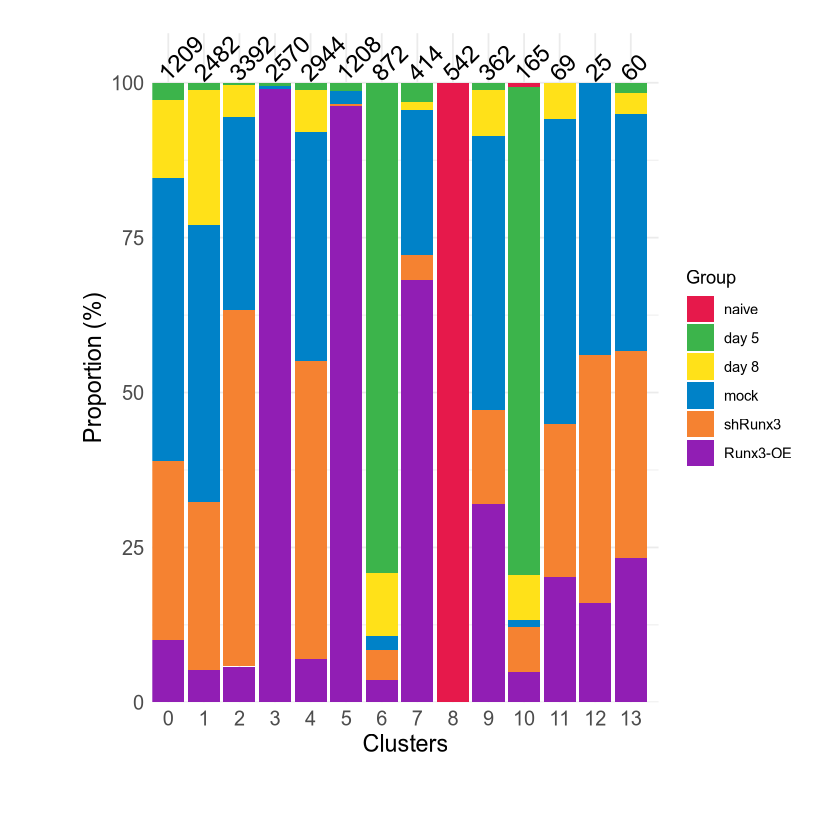

In [16]:
# Code by ChatGPT
cluster_proportions <- clusters %>%
  group_by(leiden, group) %>%
  summarise(count = n()) %>%
  group_by(leiden) %>%
  mutate(proportion = count / sum(count) * 100) %>%
  ungroup()

cluster_sums <- cluster_proportions %>%
  group_by(leiden) %>%
  summarise(total_count = sum(count), .groups = "keep")

# Create a separate vector with total counts for each cluster
total_counts <- cluster_sums$total_count

# Create a separate dataframe with leiden and total_count
label_data <- data.frame(leiden = unique(cluster_proportions$leiden), total_count = total_counts)

# Define a custom color palette with 14 different colors
custom_palette <- c("#E6194B", "#3CB44B", "#FFE119", "#0082C8", "#F58231", "#911EB4", "#46F0F0", "#F032E6", "#D2F53C", "#008080", "#000080", "#AA6E28", "#800000", "#808000")

ggplot() +
  geom_bar(data = cluster_proportions, aes(x = leiden, y = proportion, fill = group), stat = "identity") +
  geom_text(data = label_data, aes(x = leiden, y = 100, label = total_count), vjust = 0, hjust = 0, size = 5, angle = 45) +
  labs(x = "Clusters", y = "Proportion (%)") +
  scale_fill_manual(values = custom_palette, name = "Group") +
  theme_minimal() +
  theme(axis.text = element_text(size = 12),  # Adjust the size of the axis text
        axis.title = element_text(size = 14),  # Adjust the size of the axis labels
        plot.margin = margin(20, 20, 50, 50)) +  # Adjust the plot margins
  scale_y_continuous(expand = expansion(mult = c(0, 0.08))) +  # Adjust the y-axis expand
  scale_x_discrete(expand = expansion(mult = c(0, 0.06))) 


pdf 
  2

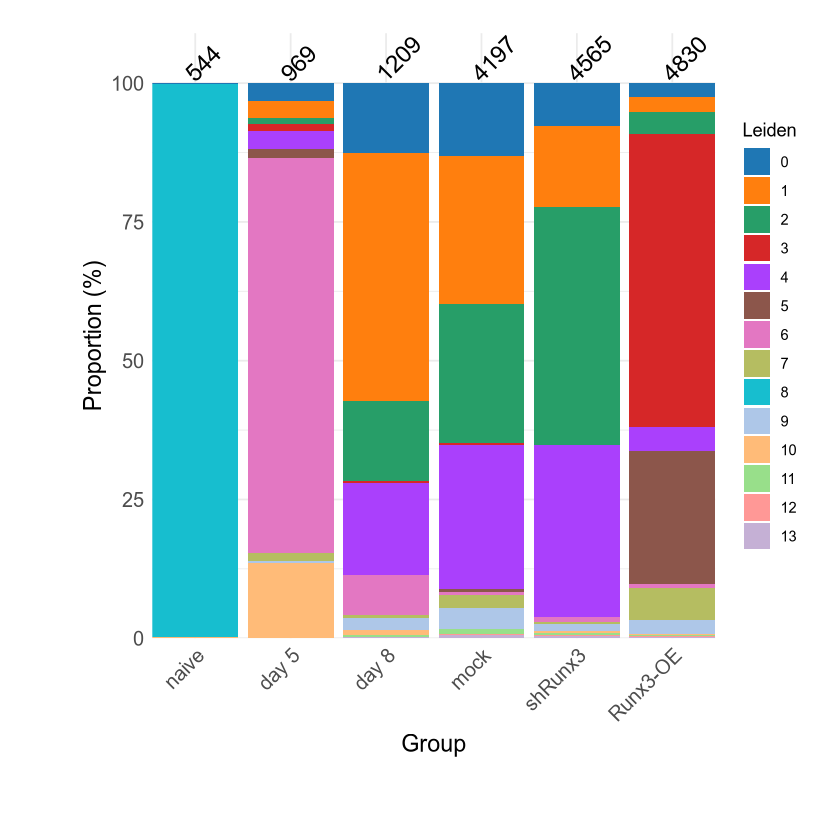

In [17]:
# Code by ChatGPT
cluster_proportions <- clusters %>%
  group_by(group, leiden) %>%
  summarise(count = n(), .groups = "keep") %>%
  group_by(group) %>%
  mutate(proportion = count / sum(count) * 100) %>%
  ungroup()

group_sums <- cluster_proportions %>%
  group_by(group) %>%
  summarise(total_count = sum(count), .groups = "keep")

# Create a separate vector with total counts for each group
total_counts <- group_sums$total_count

# Create a separate dataframe with group and total_count
label_data <- data.frame(group = unique(cluster_proportions$group), total_count = total_counts)

# Define a custom color palette with 14 different colors
# ['#1f77b4' '#ff7f0e' '#279e68' '#d62728' '#aa40fc' '#8c564b' '#e377c2'
#  '#b5bd61' '#17becf' '#aec7e8' '#ffbb78' '#98df8a' '#ff9896' '#c5b0d5']
custom_palette <- c(    '#1f77b4',
                        '#ff7f0e',
                        '#279e68',
                        '#d62728',
                        '#aa40fc',
                        '#8c564b',
                        '#e377c2',
                        '#b5bd61',
                        '#17becf',
                        '#aec7e8',
                        '#ffbb78',
                        '#98df8a',
                        '#ff9896',
                        '#c5b0d5')

p <- ggplot() +
    geom_bar(data = cluster_proportions, aes(x = group, y = proportion, fill = leiden), stat = "identity") +
    geom_text(data = label_data, aes(x = group, y = 100, label = total_count), vjust = 0, hjust = 0, size = 5, angle = 45) +
    labs(x = "Group", y = "Proportion (%)") +
    scale_fill_manual(values = custom_palette, name = "Leiden") +
    theme_minimal() +
    theme(axis.text = element_text(size = 12),  # Adjust the size of the axis text
            axis.title = element_text(size = 14),  # Adjust the size of the axis labels
            plot.margin = margin(20, 20, 50, 50),  # Adjust the plot margins
            axis.text.x = element_text(angle = 45, hjust = 1)) +  # Rotate X-axis labels by 45 degrees
    scale_y_continuous(expand = expansion(mult = c(0, 0.09))) +  # Adjust the y-axis expand
    scale_x_discrete(expand = expansion(mult = c(0, 0.07)))

print(p)

pdf("figures/barplot_Fig1B.pdf")
print(p)
dev.off()

## Volcano Plots

In [18]:
# Load gVg data
gVg <- read.csv("../../csv/04_25-12-08-02-33_RPE_gVg-diffExp.csv.gz")

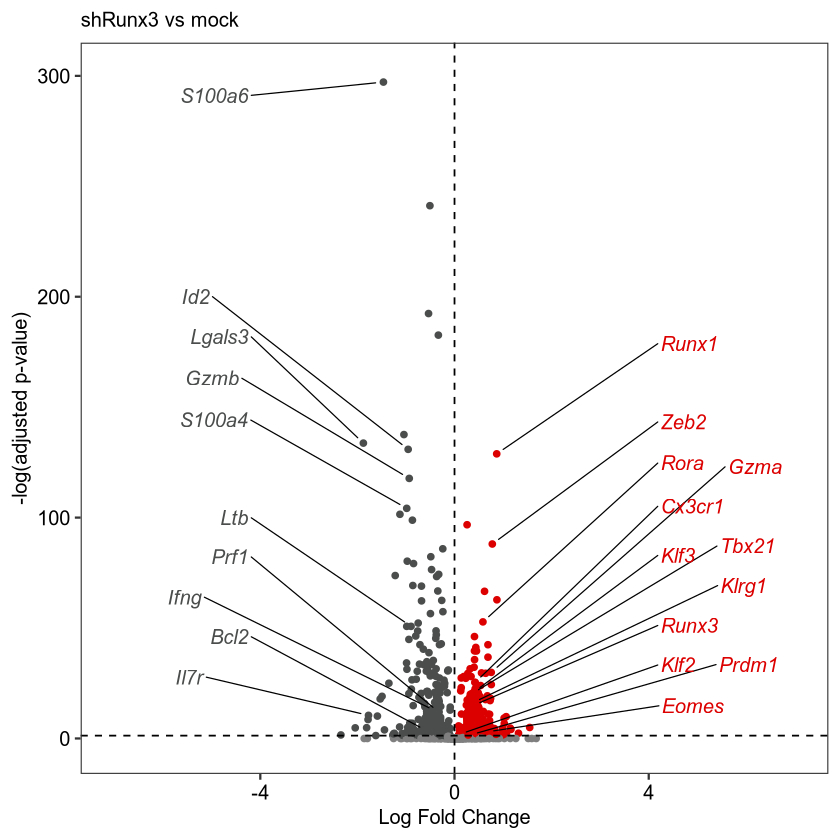

In [19]:
genes <- c(
    "Runx1", "Runx2", "Runx3", "Zeb2", "Tbx21", "Klf2", "Klf3", "Prdm1", "Rora",
    "Cx3cr1", "Klrg1", "Gzmb", "Gzma", "Prf1", "Eomes", "S100a6", "Id2", "S100a4",
    "Lgals3", "Ltb", "Ifng", "Bcl2", "Il7r"
)


subset <- processDegsStrict(gVg %>% filter(reference == "Base", group == "Null"),
                            genes = genes
                    )

p <- volcanoPlot(   subset,
                    genes = genes,
                    theme = theme,
                    pval = 0.05,
                    logfc = 0,
                    up_color = "#DC0000",
                    down_color = "#4A4D4C",
                    title = "shRunx3 vs mock",
                    overlaps = 10,
                    xlim = c(-7, 7),
                    ylim = c(-1, 300)
                )

print(p)

# Save the plot
ggsave( "figures/volcano_EFig1G.pdf", plot = p,
        width = 4, height = 4, device = "pdf")

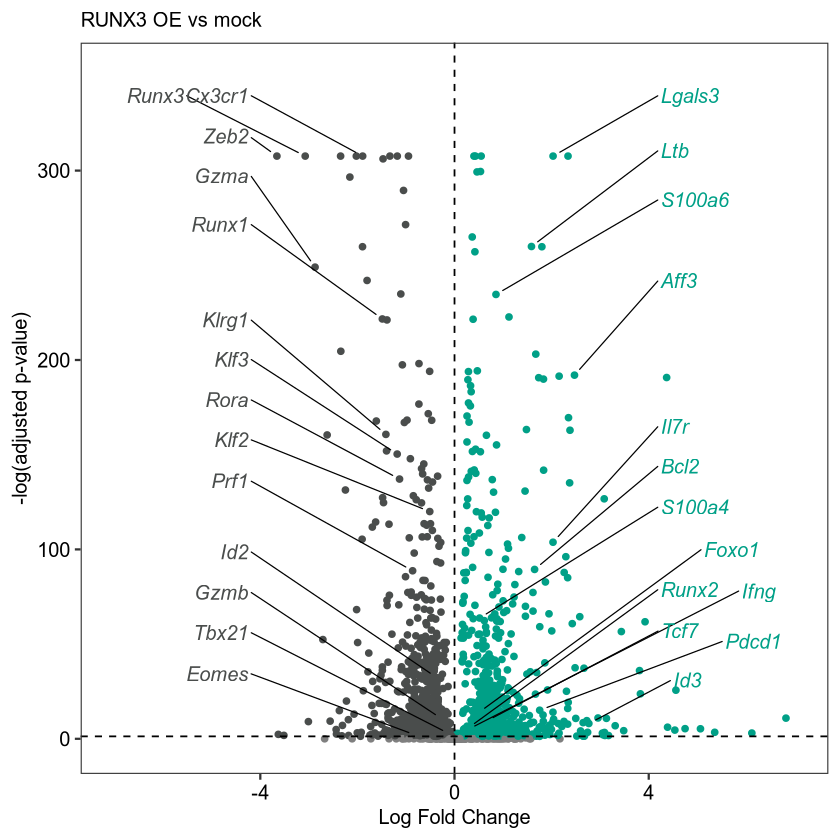

In [20]:
genes <- c(
    "Runx1", "Runx2", "Runx3", "Zeb2", "Tbx21", "Klf2", "Klf3", "Prdm1", "Rora",
    "Cx3cr1", "Klrg1", "Gzmb", "Gzma", "Prf1", "Eomes", "S100a6", "Id2", "S100a4",
    "Lgals3", "Ltb", "Ifng", "Bcl2", "Il7r", "Foxo1", "Tcf7", "Pdcd1", "Ltb", "Aff3", "Id3"
)


subset <- processDegsStrict(gVg %>% filter(reference == "Base", group == "WT"),
                            genes = genes
                    )

p <- volcanoPlot(   subset,
                    genes = genes,
                    theme = theme,
                    pval = 0.05,
                    logfc = 0,
                    up_color = "#00A087",
                    down_color = "#4A4D4C",
                    title = "RUNX3 OE vs mock",
                    overlaps = 10,
                    xlim = c(-7, 7),
                    ylim = c(-1, 350)
                )

print(p)

# Save the plot
ggsave( "figures/volcano_Fig1F.pdf", plot = p,
        width = 4, height = 4, device = "pdf")

In [21]:
# Load gVg data
shrVmock <- read.csv("../../csv/04_25-12-07-23-45_RPE_shrVmock-diffExp.csv.gz")

head(shrVmock)
unique(shrVmock$group)

group names   scores   logfoldchanges pvals         pvals_adj    
1 All   Runx1   24.53895 0.8692076      5.675462e-133 1.312805e-129
2 All   Rps11   21.29837 0.2590754      1.175490e-100  1.673264e-97
3 All   Zeb2    20.33244 0.7782330       6.640971e-92  8.777940e-89
4 All   Arhgef3 17.71472 0.6183402       3.228434e-70  2.297776e-67
5 All   Asap1   17.20760 0.8733694       2.328732e-66  1.596044e-63
6 All   Rora    15.80762 0.5850376       2.756695e-56  1.594145e-53

[1] "All"      "Cluster0" "Cluster1" "Cluster2" "Cluster4" "Cluster9"

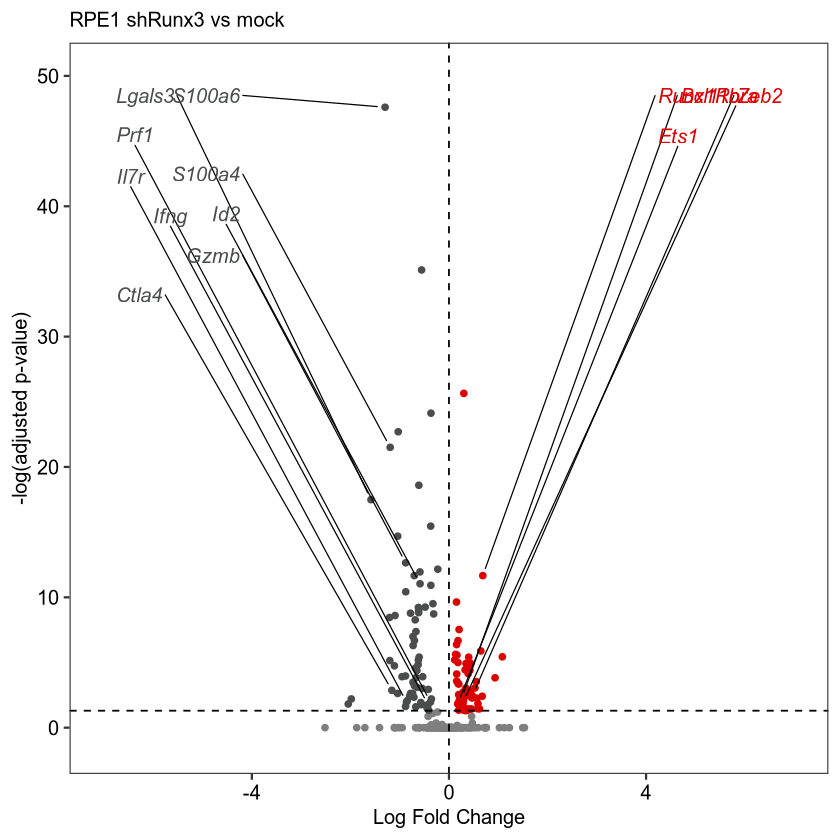

In [22]:
genes <- c(
    "Runx1", "Runx2", "Runx3", "Zeb2", "Tbx21", "Klf2", "Klf3", "Prdm1", "Rora",
    "Cx3cr1", "Klrg1", "Gzmb", "Gzma", "Prf1", "Eomes", "S100a6", "Id2", "S100a4",
    "Lgals3", "Ltb", "Ifng", "Bcl2", "Il7r", "Foxo1", "Tcf7", "Pdcd1", "Ltb", "Aff3", "Id3",
    "Junb", "Ctla4", "Bcl11b", "Ets1"
)


subset <- processDegsStrict(shrVmock %>% filter(group == "Cluster1"),
                            genes = genes
                    )

p <- volcanoPlot(   subset,
                    genes = genes,
                    theme = theme,
                    pval = 0.05,
                    logfc = 0,
                    up_color = "#DC0000",
                    down_color = "#4A4D4C",
                    title = "RPE1 shRunx3 vs mock",
                    overlaps = 10,
                    xlim = c(-7, 7),
                    ylim = c(-1, 50)
                )

print(p)

# Save the plot
ggsave( "figures/volcano_Fig1E.pdf", plot = p,
        width = 4, height = 4, device = "pdf")

## GSEA Plots

In [23]:
# Required to load GSEA reuslts from clusterProfiler
library(DOSE)
library(plotthis)

# Load GSEA rds (only comparison of interest)
gseaResult <- readRDS("../../rds/05_25-12-08-03-54_gVg-GSEA_RPE.rds")$WT_V_Base

gseaResult



DOSE v4.0.0 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

Guangchuang Yu, Li-Gen Wang, Guang-Rong Yan, Qing-Yu He. DOSE: an
R/Bioconductor package for Disease Ontology Semantic and Enrichment
analysis. Bioinformatics. 2015, 31(4):608-609



#
# Gene Set Enrichment Analysis
#
#...@organism 	 UNKNOWN 
#...@setType 	 UNKNOWN 
#...@geneList 	 Named num [1:18505] 42.8 40.5 40.3 38.3 38.1 ...
 - attr(*, "names")= chr [1:18505] "Emb" "Ifitm1" "Lgals3" "Rps19" ...
#...nPerm 	 10000 
#...pvalues adjusted by 'BH' with cutoff <1 
#...176 enriched terms found
'data.frame':	176 obs. of  11 variables:
 $ ID             : chr  "TXM-15E" "2016_SCIENCE_Mackay---TEM_vs_TCM-TRM" "Exp391_CD8---d5_KLRG1hi_Runx3_repressed" "MilnerIntersect-Ttem" ...
 $ Description    : chr  "TXM-15E" "2016_SCIENCE_Mackay---TEM_vs_TCM-TRM" "Exp391_CD8---d5_KLRG1hi_Runx3_repressed" "MilnerIntersect-Ttem" ...
 $ setSize        : int  460 148 155 230 209 85 79 490 198 53 ...
 $ enrichmentScore: num  -0.749 -0.781 -0.779 -0.728 -0.724 ...
 $ NES            : num  -2.19 -2.07 -2.05 -2.01 -1.98 ...
 $ pvalue         : num  0.000354 0.000275 0.000282 0.000295 0.0003 ...
 $ p.adjust       : num  0.00192 0.00192 0.00192 0.00192 0.00192 ...
 $ qvalue         : num  0.001

In [24]:
# Extract specifics for plotthis
result_df <- gseaResult@result
gene_list <- gseaResult@geneList
gene_set  <- gseaResult@geneSets

# Extract only items in gene_set with "Held" in the name
gene_set <- gene_set[grep("Held", names(gene_set))]

names(gene_set)
names(gene_set) <- c("Tcf7neg effectors", "Tcf7pos effectors")
result_df[grep("Held", result_df$ID), ]

[1] "Held_D8_TCF7_NEG" "Held_D8_TCF7_POS"

ID               Description      setSize enrichmentScore
Held_D8_TCF7_POS Held_D8_TCF7_POS Held_D8_TCF7_POS 597      0.5623958     
Held_D8_TCF7_NEG Held_D8_TCF7_NEG Held_D8_TCF7_NEG 588     -0.5616310     
                 NES       pvalue       p.adjust    qvalue      rank
Held_D8_TCF7_POS  1.574859 0.0001348436 0.001916397 0.001065939 1971
Held_D8_TCF7_NEG -1.679267 0.0003853565 0.001936961 0.001077376 1782
                 leading_edge                  
Held_D8_TCF7_POS tags=18%, list=11%, signal=17%
Held_D8_TCF7_NEG tags=23%, list=10%, signal=22%
                 core_enrichment                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
Held_D8_TCF7_POS Emb/Ltb/Aff3/Cd7/Il7r/Immp2l/Bcl2/Traf1/Pim2/Ly6e/Evl/Actn1/Rgs10/Ctla2a/Ssbp2/Faah/Tspan13/Pdlim1/Slc26a11/Dpp4/Parp8/Fhit/Dtd1/Thada/Ddb2/Mdn1/Ncoa7/Gas7/Tcf7/Socs3/Gpr183/Zbtb20/Myc/Id3/Ext1/Mcoln2/Clybl/Gstt2/Abcc1/Tnf/Pou6f1/Elovl6/Spint2/Ccdc162/Mrps6/Lclat1/Adk/Usp28/Gnl3/Fchsd2/Usp53/Tnfaip8/Bach2/Taf4b/Reck/Zhx2/Cd2ap/Lap3/Slc11a2/Srm/Kdm4d/Hpgds/Ikzf2/Tha1/Rpgrip1/Eef2k/Tlr1/Rcl1/Nsg2/Mthfd1/Rrp15/Appl2/Zfp827/Cd72/Slc35f2/Ccdc125/Tsr1/Ranbp10/Ppp1r14b/Cxcr3/Bicdl1/Hipk2/Gpatch4/Ctsl/Mettl1/Vps13a/Fgfr1op/Lypd6b/Pus7/Trim30c/Map3k14/Cd320/Agpat5/Prss30/Il4ra/Apex1/Tacc2/Tox/Cnga1/Frmd4a/Mtln/Prelid2/Abhd14a/Hook1/2410002F23Rik/Tbc1d4/Ttc27                                                                                                                                                                                                                 
Held_D8_TCF7_NEG Ccr5/Cd200r4/Cyp17a1/Sh3bp2/Wdr31/Stk32c/Cnnm2/Xkr8/Dnajb14/Vapb/Ccl6/Sumf1/Akr1c13/Prdm1/Dgkh/Cd40lg/Top2a/Ccdc180/Fkbp10/Fhl2/Adrb1/Fasl/Rab11fip4/Frmd5/Sord/Plekhf1/Notch3/F2rl2/Selenon/Cma1/Lmnb1/Timp2/2610528A11Rik/Prc1/Ccl9/Emp1/Sema4a/Sbk1/Ern1/Cmklr1/Gpx8/Metrnl/Slamf7/Adamts14/Ptpn4/P3h4/Fbxl2/Klra3/Phf11a/Rhoq/Insl6/Fcgr2b/Ltb4r1/Cdc20b/Serpinb1a/Tbx21/Dennd5a/Spag1/Acss2/Pycard/Chpt1/Hid1/Heatr9/Snx18/Car5b/Gss/Lfng/Ctnnbip1/Ptpn12/Lair1/Pxylp1/Casp7/Rab27a/Vopp1/Tbkbp1/G0s2/Osbpl3/F2r/Tspan32/Srcin1/Pogk/Nmnat2/Lamc1/Pik3ap1/Serpinb9/Gzmb/Rap2a/Ccl3/Serpinb6b/Rap2b/Anxa1/Smpdl3b/Arl15/Arsb/D1Ertd622e/Kcnj8/Tmem163/Gna15/Chsy1/Xylt1/Dtx1/Entpd1/Id2/Dock5/Esm1/Ptms/Stmn1/Capn2/Lpin1/Gsap/Bhlhe40/Ctsd/Apobec2/Klre1/Slc9a7/N4bp1/Ccnd3/Zmiz1/Prf1/Foxn3/Ifitm10/Gzmk/Tm6sf1/Spn/Borcs7/Dusp2/As3mt/Klrg1/Ccl5/S1pr5/Runx1/Gzma/Cx3cr1/Il18rap/Rap1b/Zeb2

In [25]:
# Rename ID in result_df
result_df$ID <- gsub("Held_D8_TCF7_POS", "Tcf7pos effectors", result_df$ID)
result_df$ID <- gsub("Held_D8_TCF7_NEG", "Tcf7neg effectors", result_df$ID)

# Rename description in result_df
result_df$Description <- gsub("Held_D8_TCF7_POS", "genes up in Tcf7p effectors", result_df$Description)
result_df$Description <- gsub("Held_D8_TCF7_NEG", "genes up in Tcf7n effectors", result_df$Description)

In [26]:
pdf("figures/GSEAplotTcf7_EFig1h.pdf", height = 8, width = 4)
GSEAPlot(   result_df,
            gene_ranks = gene_list,
            gene_sets = gene_set,
            genes_label = 
                c(      "Tcf7",
                        "Aff3",
                        "Bcl2",
                        "Ltb",
                        "Emb",
                        "Il7r",
                        "Myc",  
                        "Id3",
                        "Socs3",
                        "Cxcr3",
                        "Ncoa7",
                        "Bach2",

                        "Gzmb",
                        "Prf1",
                        "Gzmk",
                        "Dusp2",
                        "Klrg1",
                        "Ccl5",
                        "S1pr5",
                        "Runx1",
                        "Gzma",
                        "Cx3cr1",
                        "Il18rap",
                        "Zeb2"
                        ),
            combine = TRUE, ncol = 1, axes = "collect"
        )
dev.off()

Warning message in GSEAPlotAtomic(data, gene_ranks = gene_ranks, gs = gs, genes = gene_sets[[gs]], :
“Gene Gzmb,Prf1,Gzmk,Dusp2,Klrg1,Ccl5,S1pr5,Runx1,Gzma,Cx3cr1,Il18rap,Zeb2 is not in the geneset Tcf7pos effectors: genes up in Tcf7p effectors”
Warning message in GSEAPlotAtomic(data, gene_ranks = gene_ranks, gs = gs, genes = gene_sets[[gs]], :
“Gene Tcf7,Aff3,Bcl2,Ltb,Emb,Il7r,Myc,Id3,Socs3,Cxcr3,Ncoa7,Bach2 is not in the geneset Tcf7neg effectors: genes up in Tcf7n effectors”


pdf 
  2

### Individual GSEA Plots RPE1 shR vs mock

In [27]:
# Load GSEA rds (only comparison of interest)
gseaResult <- readRDS("../../rds/05_25-12-08-10-24_shrVmock-GSEA_RPE.rds")$Cluster1

gseaResult

#
# Gene Set Enrichment Analysis
#
#...@organism 	 UNKNOWN 
#...@setType 	 UNKNOWN 
#...@geneList 	 Named num [1:18505] 11.41 7.96 7.33 6.75 6.71 ...
 - attr(*, "names")= chr [1:18505] "Rps11" "Runx1" "Rps15a" "Rpl27a" ...
#...nPerm 	 10000 
#...pvalues adjusted by 'BH' with cutoff <1 
#...164 enriched terms found
'data.frame':	164 obs. of  11 variables:
 $ ID             : chr  "WangD8Runx3Promoted" "D8_MPEC-Runx3_promoted" "D8_EEC-Runx3_promoted" "Exp391_CD8---Tcf7_repressed" ...
 $ Description    : chr  "WangD8Runx3Promoted" "D8_MPEC-Runx3_promoted" "D8_EEC-Runx3_promoted" "Exp391_CD8---Tcf7_repressed" ...
 $ setSize        : int  85 398 68 219 189 51 205 45 101 71 ...
 $ enrichmentScore: num  -0.82 -0.717 -0.816 -0.679 -0.689 ...
 $ NES            : num  -2 -1.98 -1.94 -1.82 -1.82 ...
 $ pvalue         : num  0.000129 0.000106 0.000132 0.000113 0.000116 ...
 $ p.adjust       : num  0.00114 0.00114 0.00114 0.00114 0.00114 ...
 $ qvalue         : num  0.000569 0.000569 0.000569 0.000

In [28]:
# Extract specifics for plotthis
result_df <- gseaResult@result
gene_list <- gseaResult@geneList
gene_set  <- gseaResult@geneSets

# Extract only items in gene_set with "Held" in the name
gene_set <- gene_set[grep("Johnnidis", names(gene_set))]
gene_set <- gene_set[!grepl("NEG", names(gene_set))]
names(gene_set)
names(gene_set) <- c("CD62Lpos effectors")
result_df[grep("Held", result_df$ID), ]

[1] "Johnnidis_D8_CD62LHi"

ID               Description      setSize enrichmentScore
Held_D8_TCF7_NEG Held_D8_TCF7_NEG Held_D8_TCF7_NEG 588     -0.5222544     
Held_D8_TCF7_POS Held_D8_TCF7_POS Held_D8_TCF7_POS 597      0.3346756     
                 NES       pvalue       p.adjust    qvalue       rank
Held_D8_TCF7_NEG -1.464418 0.0001025431 0.001136206 0.0005688324 2261
Held_D8_TCF7_POS  1.148682 0.0259740260 0.052589386 0.0263284474 2704
                 leading_edge                  
Held_D8_TCF7_NEG tags=18%, list=12%, signal=16%
Held_D8_TCF7_POS tags=18%, list=15%, signal=16%
                 core_enrichment                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
Held_D8_TCF7_NEG Rasal1/Diaph3/Snx18/Sept11/Dap/Stx2/Sbk1/Plekha6/Specc1/Ulbp1/Mastl/Sumf1/Heatr9/Mt1/Cmklr1/Gns/L1cam/Gna15/Prdx4/Phf11a/Apobec2/Tmem37/Selenom/Il2ra/Pik3ap1/Akr1c13/Adrb2/Epas1/Rab11fip4/Rasl11a/Tax1bp3/Plekhg3/G0s2/Esm1/Xylt1/Fhl2/Spn/1500009L16Rik/F2r/Tle1/Ifitm10/Ccdc71l/Hid1/Klrg1/Lrrk1/Il12rb2/Ern1/Rell1/Chil5/Coro2a/Nckap1/Fcgr2b/Rara/Nmnat2/1700017B05Rik/Sgk1/Med12l/Insl6/Havcr2/Ctnnbip1/Ncald/Emp1/Lamb3/Ptpn4/Car5b/Lmnb1/Dapk2/Lamc1/Smpdl3b/Arhgef12/Osbpl3/Cxcr6/N4bp1/Dock5/AA467197/Fry/Ifng/Itgax/Tmem163/Prf1/Itgam/Ccl3/Anxa1/Sytl2/Cd48/Pycard/Dgkh/Ptms/Snx10/Stard10/Itga1/Reep5/Lgals1/Rap1gap2/Dusp2/Wdr95/Ccr2/Ahnak/Bhlhe40/Id2/Gzmb/Ccl4/Lgals3          
Held_D8_TCF7_POS Asap1/Tnfaip8/Slamf6/Tnfrsf25/Pecam1/Tcf7/Tspan3/Fchsd2/Samd3/Evl/Inpp4b/Rnf157/Zhx2/Parp8/Aim2/Usp18/Mgst2/Zfp827/Cd9/P2rx7/Crtam/Trib2/Emb/Adk/Ncoa7/Mtln/Cd22/Cpm/Tbxa2r/Bach2/Tnfsf8/Aff3/Tent5c/Ppp2r3a/Dnajc27/Cd72/Cd101/Metap1d/Rflnb/Ranbp10/St6galnac3/Rab37/Sell/Ttc3/Rapgef4/Rgs10/Als2cl/Il4ra/Retreg1/Slc12a2/Fgfr1op/Dnajb2/Ext1/Hvcn1/Dapl1/Pdk1/Klhl3/Mmab/Nsg2/Lap3/Ikzf2/Cd2ap/Mccc2/Cmya5/Ccr7/Cd320/Asb2/Thada/Sh2b3/Myb/Thra/Oasl1/Mrtfb/Slc26a11/Ice2/Usp53/Enkur/Agpat5/Eya2/Smco4/Gstt2/Plcxd1/Plxnc1/Slc35f2/Hook2/Castor1/Plekha1/Vps13a/Espn/Trub1/Ptprs/C1qtnf4/Dtd1/Dph1/Tnf/Nckap5l/Ctss/Synj2/Acpp/Zfp395/Nr2c1/Cd200/Mapre3/Mboat1/Socs3/Sfmbt2/Rrp15/Map7/Vegfb

In [29]:
# Rename ID in result_df
result_df$ID <- gsub("Held_D8_TCF7_POS", "Tcf7pos effectors", result_df$ID)
result_df$ID <- gsub("Johnnidis_D8_CD62LHi", "CD62Lpos effectors", result_df$ID)

# Rename description in result_df
result_df$Description <- gsub("Held_D8_TCF7_POS", "genes up in Tcf7pos effectors", result_df$Description)
result_df$Description <- gsub("Johnnidis_D8_CD62LHi", "genes up in CD62Lpos effectors", result_df$Description)

In [30]:
pdf("figures/GSEAplot_shR-RPE1_EFig1E.pdf", height = 4, width = 4)
GSEAPlot(   result_df,
            gene_ranks = gene_list,
            gene_sets = gene_set,
            genes_label = 
                c(      "P2rx7",
                        "Slamf6",
                        "Myb",
                        "Cd9",
                        "Etv6",
                        "Setbp1",
                        "Asap1",
                        "Ehd3",
                        "Tnfsf8",
                        "Tcf7",
                        "Eomes",
                        "Cxcr5"
                        ),
            combine = TRUE, ncol = 1, axes = "collect"
        )
dev.off()

Warning message in GSEAPlotAtomic(data, gene_ranks = gene_ranks, gs = gs, genes = gene_sets[[gs]], :
“Gene Tcf7 is not in the geneset CD62Lpos effectors: genes up in CD62Lpos effectors”


pdf 
  2